In [1]:
# importing required packages

import pandas as pd
import re 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2

In [2]:
# Loading the data

house=pd.read_csv(r'housing.csv',low_memory=False)

# Data Understanding

The <b>housing dataset</b> provides comprehensive information on various attributes associated with 
residential properties, including price, number of bedrooms and bathrooms, square footage, 
location details, and other relevant features. The objective of this project is to conduct an indepth analysis of the dataset to derive valuable insights for stakeholders in the real estate 
indust

#### The dataset contains following information:
1. Date: The date when the property information was recorded.
2. Price: The price of the residential property.
3. Bedrooms: The number of bedrooms in the property.
4. Bathrooms: The number of bathrooms in the property.
5. Sqft_living: The total square footage of living space in the property.
6. Sqft_lot: The total square footage of the lot or land area associated with the property.
7. Floors: The number of floors in the property.
8. Waterfront: Indicates whether the property has a waterfront view (binary: 0 for no, 1 
for yes).
9. View: An index from 0 to 4 representing the quality of the view from the property.
10. Condition: An index from 1 to 5 representing the overall condition of the property.
11. Sqft_above: The square footage of the interior space above the ground level.
12. Sqft_basement: The square footage of the basement space in the property.
13. Yr_built: The year when the property was built.
14. Yr_renovated: The year when the property was last renovated.
15. Street: The street address of the property.
16. City: The city where the property is located.
17. Statezip: The state and zip code Cityproperty.
18. Country: The country where the property is locatedry.

# Data Cleaning

In [3]:
# Checking the informations avail in the dataset

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
# getting the description of the dataset

house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4560.000000,4.586000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4577.000000,4600.000000
mean,5.539483e+05,3.400870,2.160815,2138.935526,1.485981e+04,1.512065,0.007174,0.240652,3.451739,1840.825435,312.081522,1970.808827,808.608261
std,5.808371e+05,0.908848,0.783781,965.011449,3.592050e+04,0.538288,0.084404,0.778405,0.677230,970.705795,464.137228,29.724793,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,350.000000,0.000000,1900.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.610000e+05,3.000000,2.250000,1980.000000,7.683500e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.550000e+05,4.000000,2.500000,2620.000000,1.101850e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,20450.000000,4820.000000,2014.000000,2014.000000


In [5]:
# getting the columns of the dataset

set(house)

{'bathrooms',
 'bedrooms',
 'city',
 'condition',
 'country',
 'date',
 'floors',
 'price',
 'sqft_above',
 'sqft_basement',
 'sqft_living',
 'sqft_lot',
 'statezip',
 'street',
 'view',
 'waterfront',
 'yr_built',
 'yr_renovated'}

In [6]:
# getting the shape of the dataset

house.shape

(4600, 18)

In [7]:
# Checking if any null values present in the dataset over columnn wise

house.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64

In [8]:
# Checking the total null values present in the dataset

house.isnull().sum().sum()

134

In [9]:
# Dropping the column more than 50% of missing values

house=house.dropna(axis=1, thresh=int(len(house.index)/2))

In [10]:
# Checking the percentage of null values present in the dataset

round(100*(house.isnull().sum()/len(house.index)),2).sort_values(ascending=False)

city             1.24
sqft_living      0.87
yr_built         0.50
sqft_lot         0.30
date             0.00
sqft_above       0.00
statezip         0.00
street           0.00
yr_renovated     0.00
sqft_basement    0.00
condition        0.00
price            0.00
view             0.00
waterfront       0.00
floors           0.00
bathrooms        0.00
bedrooms         0.00
country          0.00
dtype: float64

In [11]:
# Checking if any null values present in the dataset over row wise

house.isnull().sum(axis=1).max()

2

In [12]:
# Checking for the unique values present in the dataset

house.apply(lambda x:x.unique()) 

date             [02/05/2014 0:00, 03/05/2014 0:00, 04/05/2014 ...
price            [313000.0, 2384000.0, 342000.0, 420000.0, 5500...
bedrooms                            [3, 5, 4, 2, 6, 7, 9, 1, 8, 0]
bathrooms        [1.5, 2.5, 2.0, 2.25, 1.0, 1.75, 2.75, 3.0, 3....
sqft_living      [1340.0, 3650.0, 1930.0, 2000.0, 1940.0, 880.0...
sqft_lot         [nan, 9480.0, 9720.0, 6700.0, 7231.0, 15878.0,...
floors                              [1.5, 2.0, 1.0, 2.5, 3.0, 3.5]
waterfront                                                  [0, 1]
view                                               [0, 4, 1, 2, 3]
condition                                          [3, 5, 4, 2, 1]
sqft_above       [1340, 3370, 1930, 1000, 1140, 880, 1350, 2710...
sqft_basement    [0, 280, 1000, 800, 860, 1010, 360, 690, 470, ...
yr_built         [1955.0, 1921.0, 1966.0, 1963.0, 1976.0, 1938....
yr_renovated     [2005, 0, 1992, 1994, 2010, 1988, 2009, 1969, ...
street           [18810 Densmore Ave N, 709 W Blaine St, 26206

In [13]:
# Dropping the unneccessary column

house=house.drop(["country","yr_renovated","sqft_basement"],axis=1)

In [14]:
# Checking the shape after dropping the empty rows in the dataset

house.shape

(4600, 15)

In [15]:
# Printing the first 5 rows of the dataset using head function


house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,yr_built,street,city,statezip
0,02/05/2014 0:00,313000.0,3,1.50,1340.0,NaN,1.5,0,0,3,1340,1955.0,18810 Densmore Ave N,Shoreline,WA 98133
1,02/05/2014 0:00,2384000.0,5,2.50,3650.0,NaN,2.0,0,4,5,3370,1921.0,709 W Blaine St,Seattle,WA 98119
2,02/05/2014 0:00,342000.0,3,2.00,1930.0,NaN,1.0,0,0,4,1930,1966.0,26206-26214 143rd Ave SE,Kent,WA 98042
3,02/05/2014 0:00,420000.0,3,2.25,2000.0,NaN,1.0,0,0,4,1000,1963.0,857 170th Pl NE,Bellevue,WA 98008
4,02/05/2014 0:00,550000.0,4,2.50,1940.0,NaN,1.0,0,0,4,1140,1976.0,9105 170th Ave NE,Redmond,WA 98052


# Checking Outliers

In [16]:
# Pick up the columns of 'float' and 'int'

numeric_columns = house.select_dtypes(include=["float","int"])

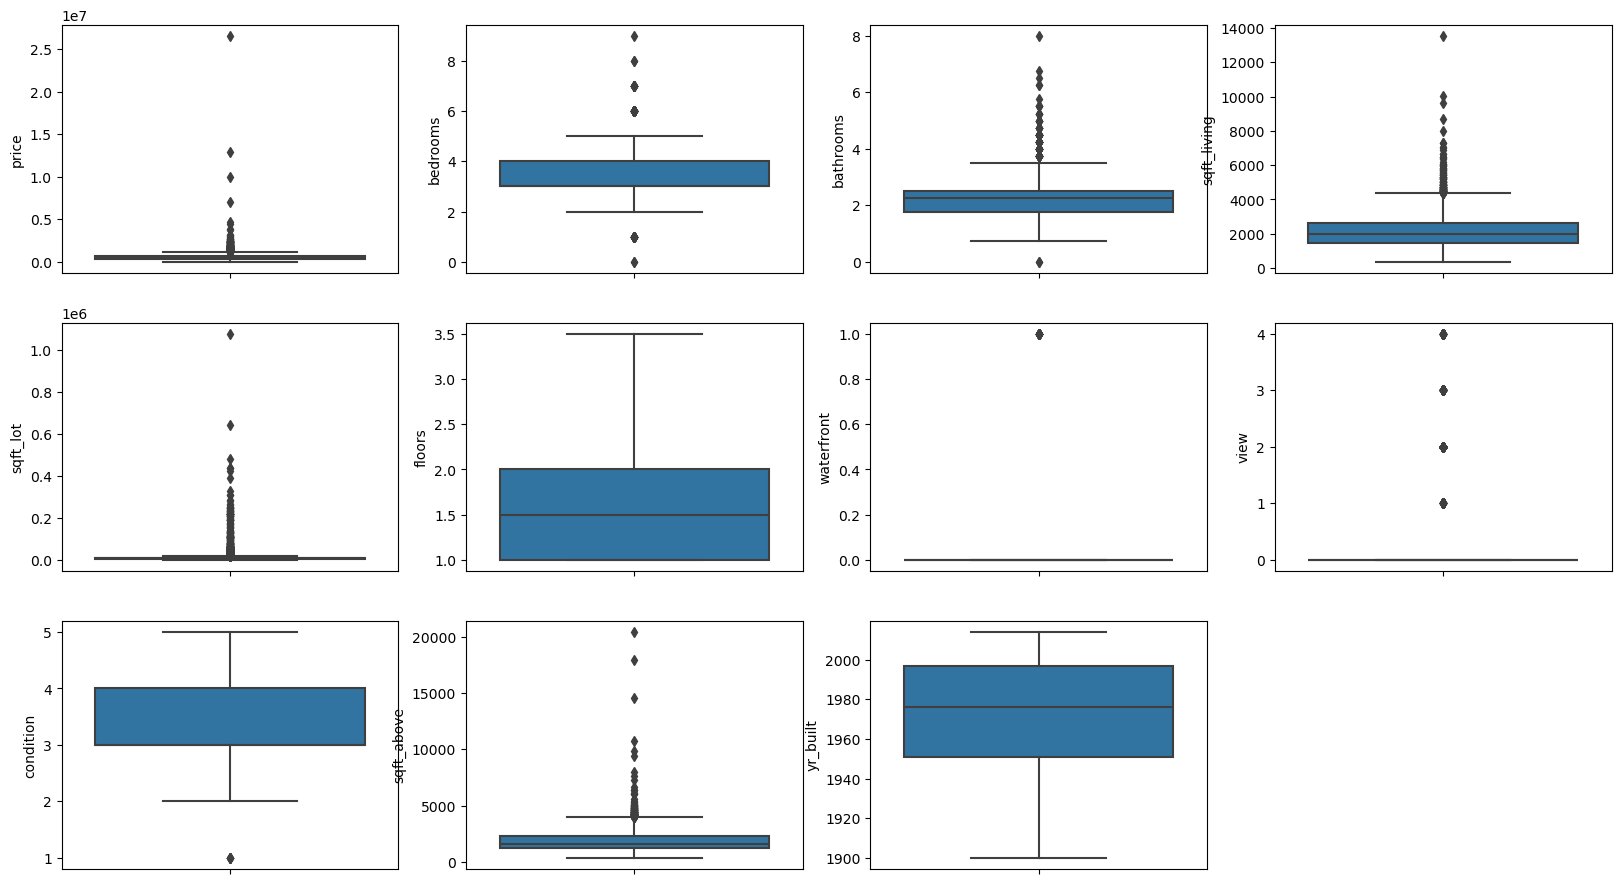

In [17]:
# Boxplot for finding outliers 

plt.figure(figsize=(20,100))
for i in range(len(numeric_columns.columns)):
    plt.subplot(26,4,i+1)
    sns.boxplot(y = numeric_columns.columns[i], data=house)
plt.show()

In [18]:
# Hence the value distorts more at 100%. So let us drop the records where > 99%

house = house[~(house["sqft_above"]>4461)]
house = house[~(house["sqft_lot"]>95172)]
house = house[~(house["price"]>2027380)]

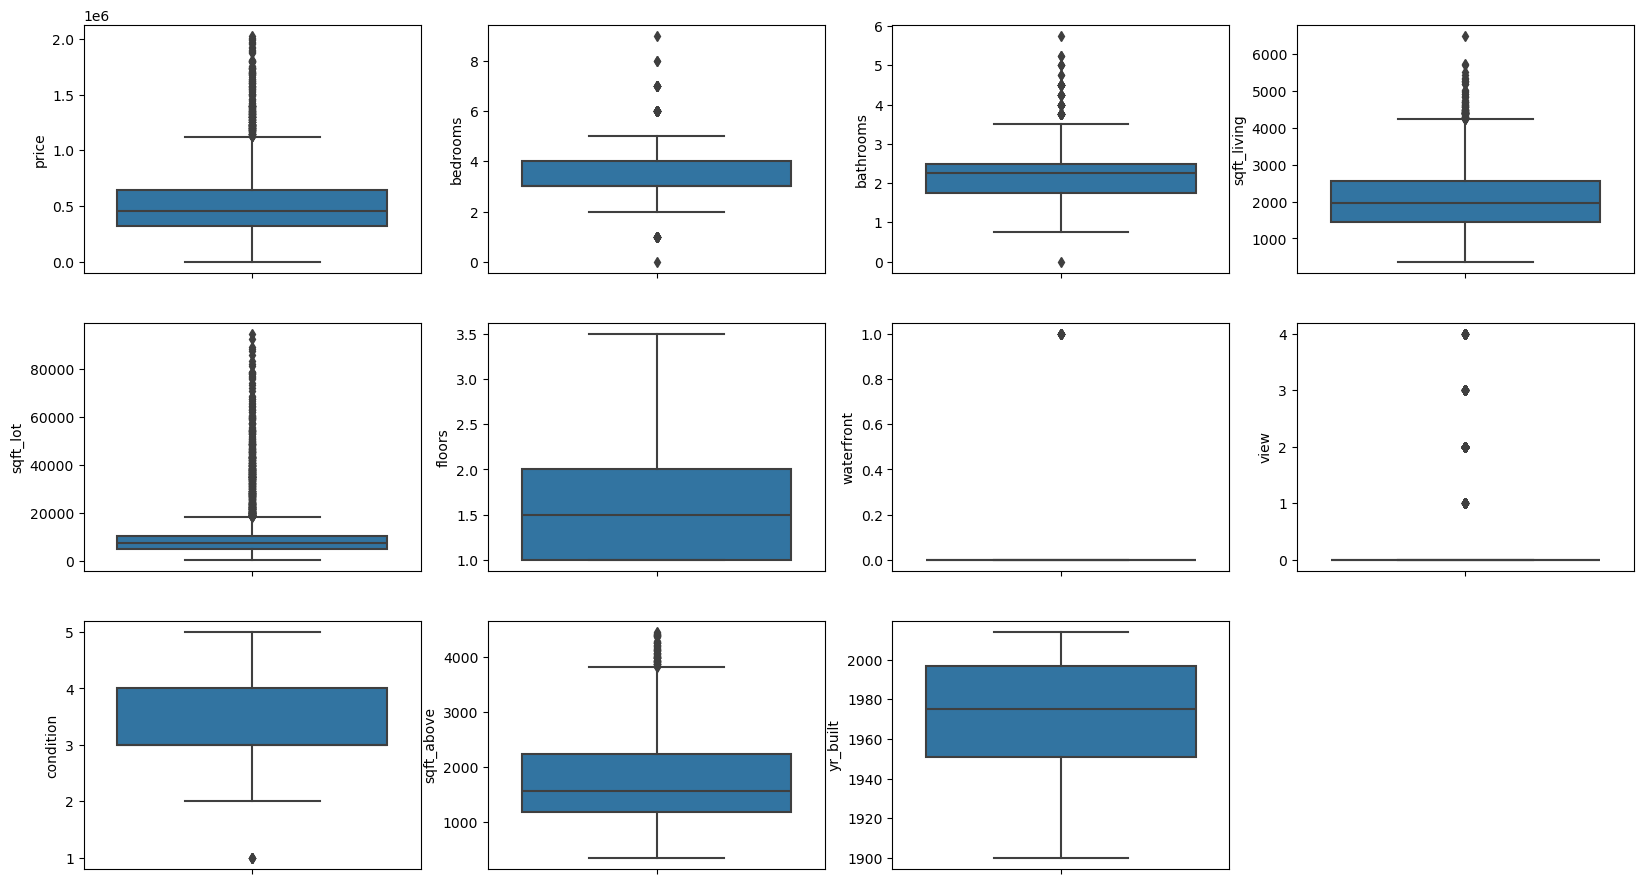

In [19]:
# Boxplot after remove outliers 

plt.figure(figsize=(20,100))
for i in range(len(numeric_columns.columns)):
    plt.subplot(26,4,i+1)
    sns.boxplot(y = numeric_columns.columns[i], data=house)
plt.show()

In [20]:
# checking the shape of the dataframe ofter remove outliers

house.shape

(4423, 15)

In [21]:
# Function to convert the address to valid format

def standardize_address(address):
    
    # Remove extra spaces and make the address lower case
    
    address = re.sub(r'\s+', ' ', address.strip()).lower()

    # Replace common abbreviations
    
    abbreviations = {
        r'\bave\b': 'Avenue',
        r'\bblvd\b': 'Boulevard',
        r'\bct\b': 'Court',
        r'\bdr\b': 'Drive',
        r'\bln\b': 'Lane',
        r'\bpl\b': 'Place',
        r'\brd\b': 'Road',
        r'\bst\b': 'Street',
        r'\bapt\b': 'Apartment',
        r'\bne\b': 'NE',
        r'\bnw\b': 'NW',
        r'\bse\b': 'SE',
        r'\bsw\b': 'SW',
        r'\bn\b': 'N',
        r'\bs\b': 'S',
        r'\be\b': 'E',
        r'\bw\b': 'W',
    }

    for abbr, full in abbreviations.items():
        address = re.sub(abbr, full, address)
    

    # Ensure door numbers or address ranges are correctly formatted
    
    match = re.match(r'(\d+-?\d*)\s+(.*)', address)
    if match:
        door_number = match.group(1)
        address_body = match.group(2)
        standardized_address = f"{door_number} {address_body}"
    else:
        standardized_address = address

    return standardized_address


# Filter rows where the address starts with a number

house = house[house['street'].str.match(r'^\d+.*')]

# Apply the function to the Address column

house['street'] = house['street'].apply(standardize_address)

In [22]:
# Imputing the missing values with mean value


house["city"]=house["city"].fillna("Seattle")

In [23]:
house["sqft_living"]=house["sqft_living"].fillna(2139)

In [24]:
house["sqft_lot"]=house["sqft_lot"].fillna(	14860)

In [25]:
house["yr_built"]=house["yr_built"].fillna(1971)

In [26]:
house['bedrooms'] = house['bedrooms'].replace(0, 3)
house['price'] = house['price'].replace(0, 553948.3).round(2)
house['bathrooms'] = house['bathrooms'].replace(0, 3)

In [27]:
# Checking the percentage of null values present in the dataset

round(100*(house.isnull().sum()/len(house.index)),2).sort_values(ascending=False)

date           0.0
price          0.0
bedrooms       0.0
bathrooms      0.0
sqft_living    0.0
sqft_lot       0.0
floors         0.0
waterfront     0.0
view           0.0
condition      0.0
sqft_above     0.0
yr_built       0.0
street         0.0
city           0.0
statezip       0.0
dtype: float64

In [28]:
# convert the date to valid date format(DD-MM-YYYY)

house['date'] = pd.to_datetime(house['date'], format="mixed").dt.strftime('%d/%m/%Y')

In [29]:
house['date'] = pd.to_datetime(house['date'], format="mixed").dt.strftime('%d/%m/%Y')

# Feature Engineering

In [30]:
# Types of house is created

house["type"] = house["bedrooms"].map({ 1:"1BHK", 2:"2BHK", 3:"3BHK",4:"4BHK",5:"5BHK",6:"6BHK", 7:"7BHK",8:"8BHK",9:"9BHK"})

In [31]:
#Expanding the numerical terms into categories 

house['num_view'] = house["view"]
house["view"] = house["view"].map({0:"No View", 1:"Poor View", 2:"Average View", 3:"Good View",4:"Excellent View"})

In [32]:
house['num_condition'] = house["condition"]
house["condition"] = house["condition"].map({ 1:"Poor", 2:"Below Average", 3:"Average",4:"Good",5:"Excellent"})

In [33]:
house["waterfront"] = house["waterfront"].map({0:"No", 1:"Yes"})

In [34]:
# Convert the desired columns to 'int'

house['yr_built'] = house['yr_built'].apply(pd.to_numeric).astype(int)

In [35]:
house[['bathrooms', 'floors','sqft_living','sqft_lot']] = house[['bathrooms', 'floors','sqft_living','sqft_lot']].apply(np.ceil).astype(int)

In [36]:
#print the dataframe

house

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,yr_built,street,city,statezip,type,num_view,num_condition
0,02/05/2014,313000.00,3,2,1340,14860,2,No,No View,Average,1340,1955,18810 densmore Avenue N,Shoreline,WA 98133,3BHK,0,3
2,02/05/2014,342000.00,3,2,1930,14860,1,No,No View,Good,1930,1966,26206-26214 143rd Avenue SE,Kent,WA 98042,3BHK,0,4
3,02/05/2014,420000.00,3,3,2000,14860,1,No,No View,Good,1000,1963,857 170th Place NE,Bellevue,WA 98008,3BHK,0,4
4,02/05/2014,550000.00,4,3,1940,14860,1,No,No View,Good,1140,1976,9105 170th Avenue NE,Redmond,WA 98052,4BHK,0,4
5,02/05/2014,490000.00,2,1,880,14860,1,No,No View,Average,880,1938,522 NE 88th Street,Seattle,WA 98115,2BHK,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09/07/2014,308166.67,3,2,1510,6360,1,No,No View,Good,1510,1971,501 N 143rd Street,Seattle,WA 98133,3BHK,0,4
4596,09/07/2014,534333.33,3,3,1460,7573,2,No,No View,Average,1460,1971,14855 SE 10th Place,Bellevue,WA 98007,3BHK,0,3
4597,09/07/2014,416904.17,3,3,3010,7014,2,No,No View,Average,3010,1971,759 ilwaco Place NE,Renton,WA 98059,3BHK,0,3
4598,10/07/2014,203400.00,4,2,2090,6630,1,No,No View,Average,1070,1971,5148 S creston Street,Seattle,WA 98178,4BHK,0,3


# EDA

### Univariate Analysis

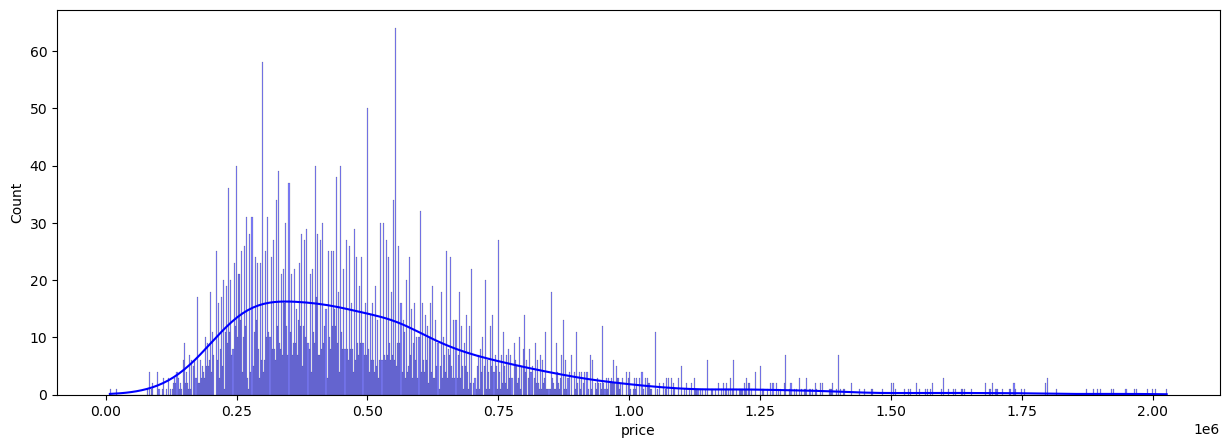

In [37]:
# Histogram exploring the distributions of 'price'

plt.figure(figsize=(15,5))
sns.histplot(house['price'],bins=1000,color='blue',kde=True)
plt.show()

It implies that the <b>house price are mostly near 5,50,000.</b>

In [38]:
# Pick up the columns of 'float' and 'int'

numeric_columns = house.select_dtypes(include=["float","int"])

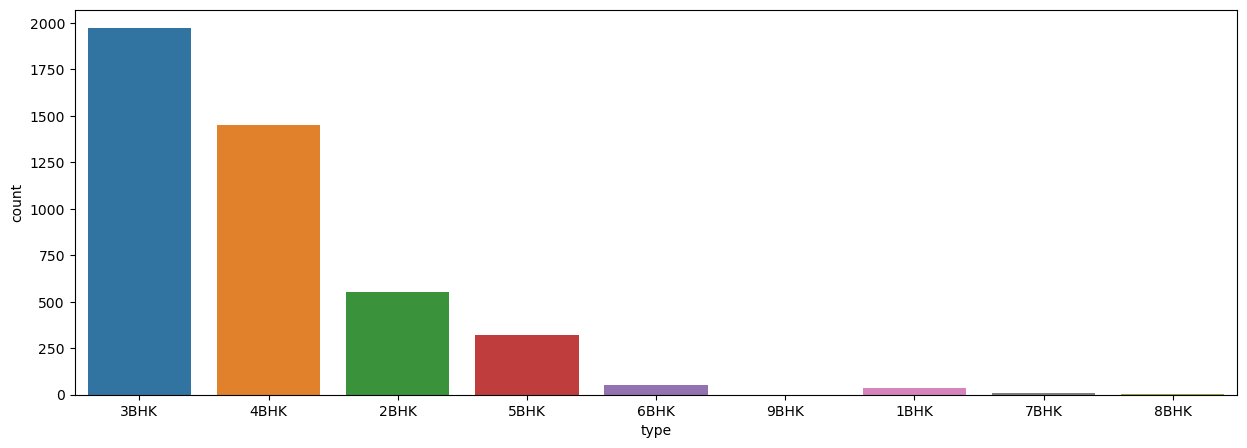

In [39]:
# Countplot for 'type'

plt.figure(figsize=(15,5))
sns.countplot(x = house["type"])
plt.show()

From this, we can easily say that <b>most of the house are 3BHK.<b>

### Segmented Univariate Analysis

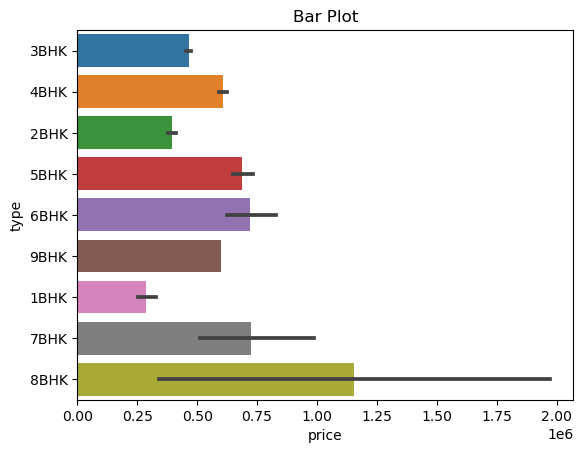

In [40]:
# Barplot comparing the'price' with 'type'

sns.barplot(x=house['price'],y=house['type'])
plt.title('Bar Plot')
plt.xlabel('price')
plt.ylabel('type')
plt.show()

It is noted that <b>house having 8 bedrooms are more price.<b>

### Bivariate Analysis

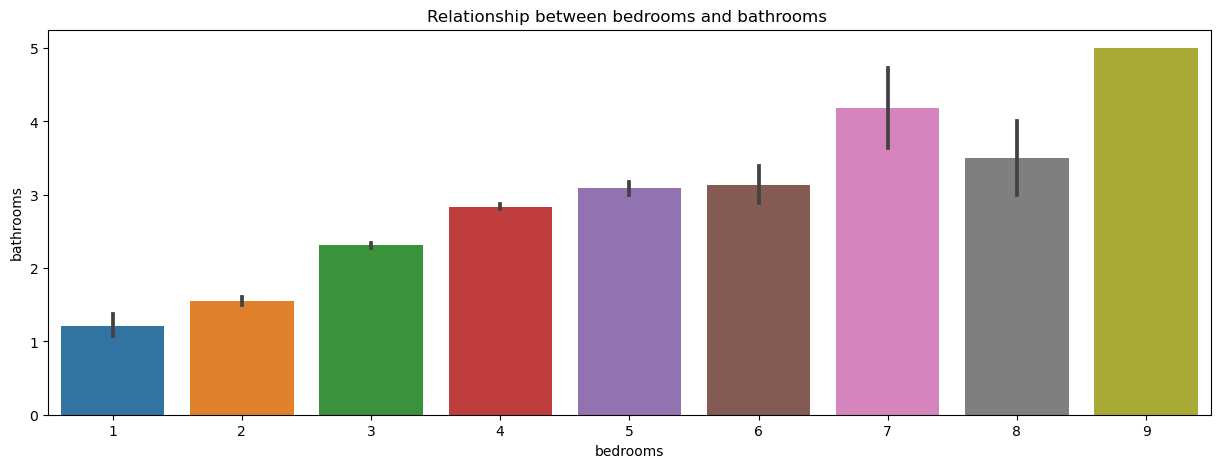

In [41]:
# Checking the relationship between 'price' and 'OpSys'

plt.figure(figsize=(15,5))
sns.barplot(x=house['bedrooms'],y=house['bathrooms'])
plt.title('Relationship between bedrooms and bathrooms ')
plt.xlabel('bedrooms')
plt.ylabel('bathrooms')
plt.show()

From this, We can know that the <b>'bedrooms' and 'bathrooms' increase respectively.

### Using Testing to find out the highly correlated variables

### ANOVA Test

In [42]:
x1 = pd.DataFrame(house[['bedrooms','sqft_living']])
x1

,bedrooms,sqft_living,yr_built
0,3,1340,1955
2,3,1930,1966
3,3,2000,1963
4,4,1940,1976
5,2,880,1938
...,...,...,...
4595,3,1510,1971
4596,3,1460,1971
4597,3,3010,1971
4598,4,2090,1971


In [43]:
y1 = pd.DataFrame(house['price'])
y1

,price
0,313000.00
2,342000.00
3,420000.00
4,550000.00
5,490000.00
...,...
4595,308166.67
4596,534333.33
4597,416904.17
4598,203400.00


In [44]:
select = SelectKBest(score_func=f_classif,k=1)
fit = select.fit(x1,y1)
features = x1.columns[fit.get_support()]

In [45]:
features

Index(['bedrooms', 'sqft_living'], dtype='object')

From this, We can say that the <b>'bedrooms' and 'sqft_living' columns are highly dependent for 'price'.<b>

### Chi-Square Test

In [46]:
x=pd.DataFrame(house[['price','num_condition']])
y=pd.DataFrame(house['yr_built'])

In [47]:
select = SelectKBest(score_func=chi2,k=1)
fit = select.fit(x,y)
features = x.columns[fit.get_support()]

In [48]:
features

Index(['price'], dtype='object')

Thus the yr_built is <b>highly correlated with price.<b>

### Multivariate Analysis

In [49]:
#creating a dataframe with analytical coloumns

a=pd.DataFrame(house[['price','bedrooms','sqft_living','floors','yr_built','type','num_view','num_condition']])

<Figure size 1500x500 with 0 Axes>

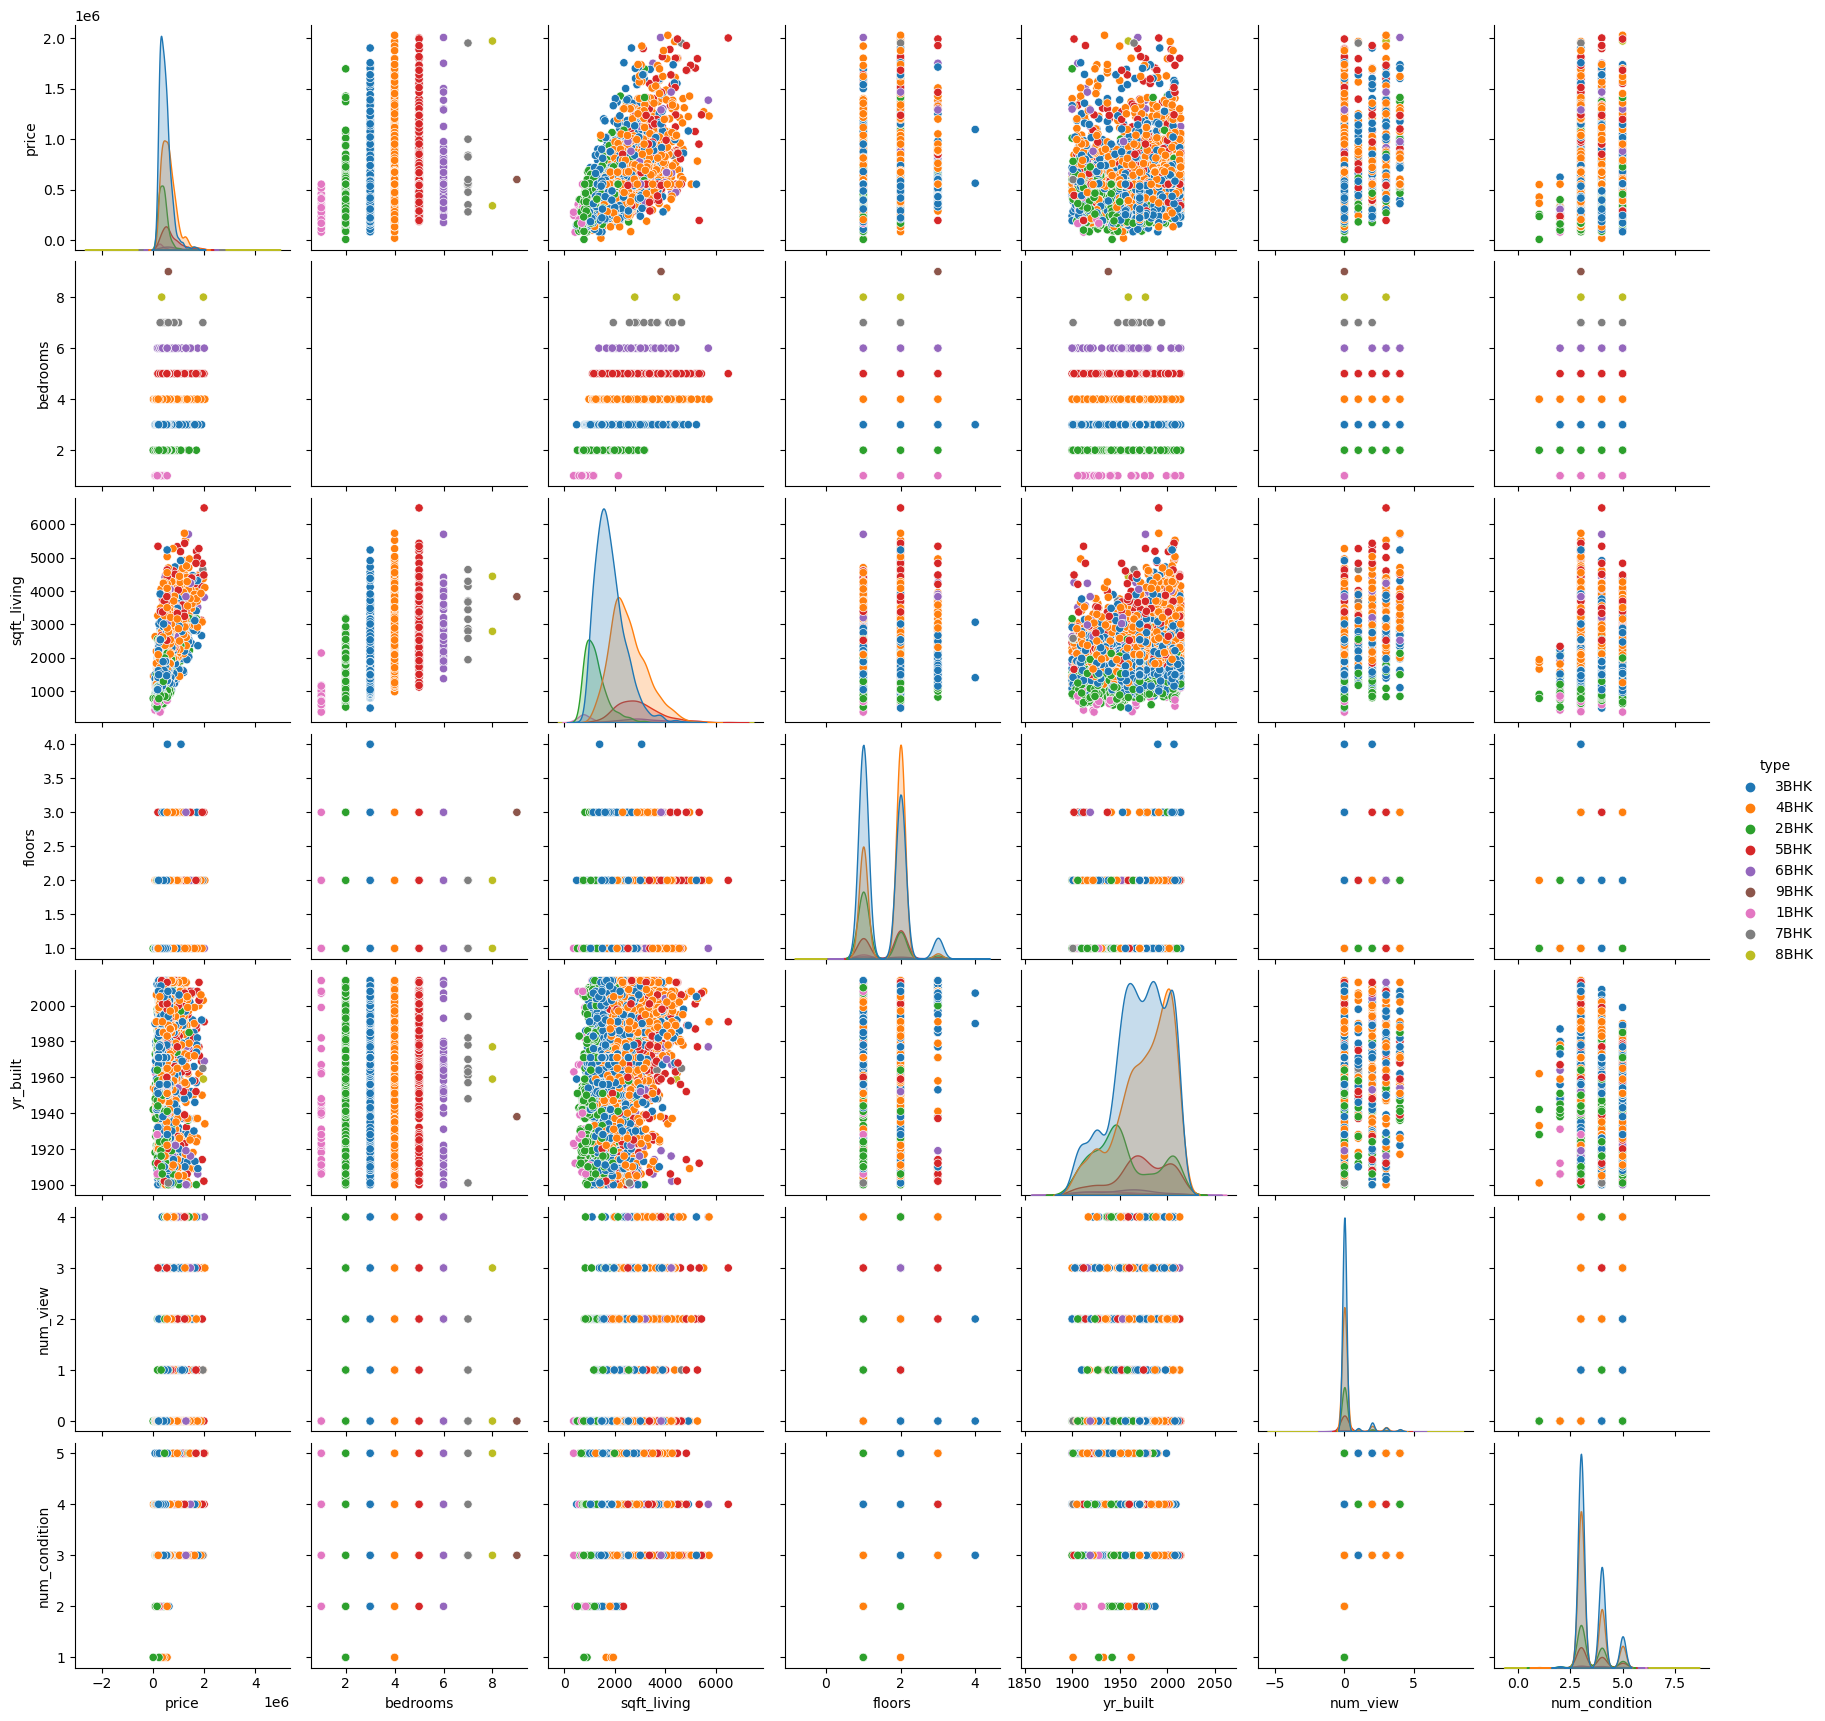

In [50]:
# Using pairplot to find the overall replationship between each columns

plt.figure(figsize=(15,5))
sns.pairplot(data = a,hue='type')
plt.show()

## Visualization

### Line Plot

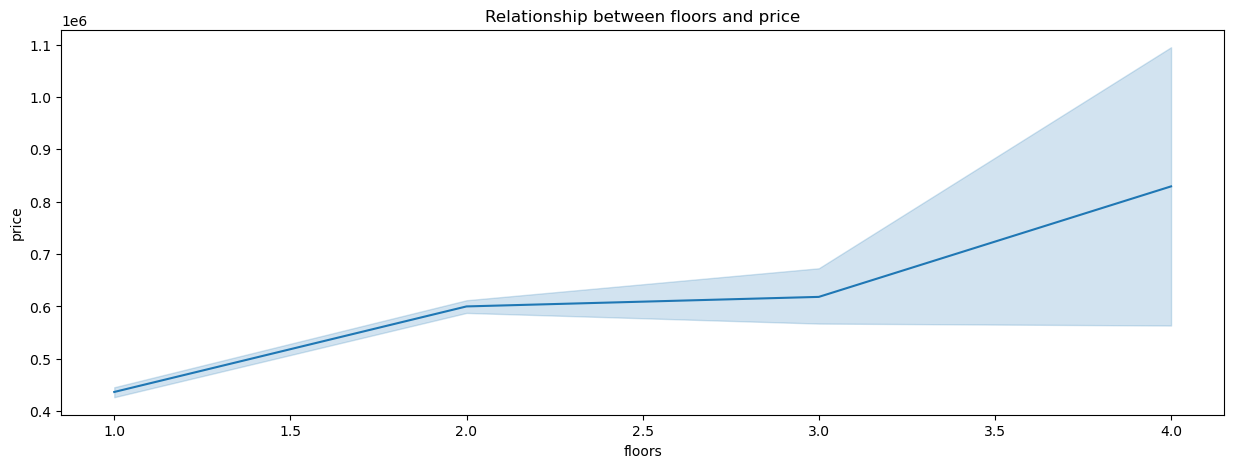

In [51]:
# Visualizing the 'Prices' with 'floors'

plt.figure(figsize=(15,5))
sns.lineplot(x='floors',y='price',data=house)
plt.title('Relationship between floors and price')
plt.xlabel('floors')
plt.ylabel('price')
plt.show()

From this, we are getting that <b>house on 4th floor has more price.<b>

### Pie Chart

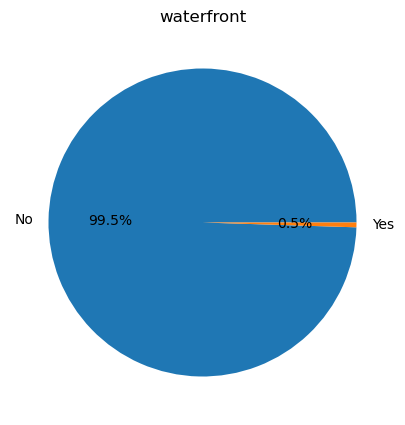

In [52]:
# Exploring the 'waterfront'

plt.figure(figsize=(15,5))
count = house['waterfront'].value_counts()
plt.pie(x=count,labels=count.index,autopct='%1.1f%%')
plt.title('waterfront')
plt.show()

From this, we are know that <b>99.5% of house have no water front.<b>

### Histogram 

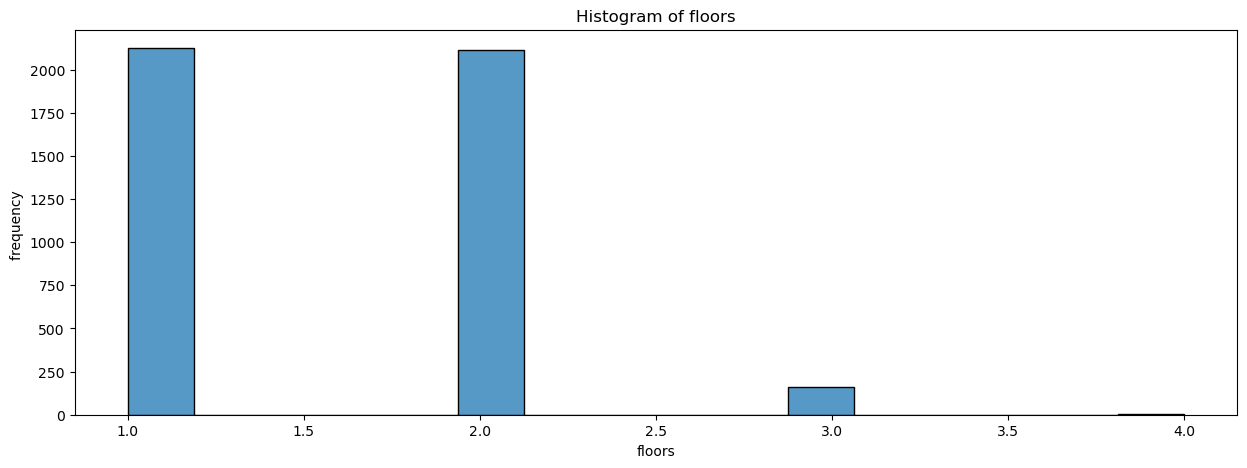

In [53]:
# Visualizing the count of floors

plt.figure(figsize=(15,5))
sns.histplot(house['floors'],bins=16)
plt.title('Histogram of floors')
plt.xlabel('floors')
plt.ylabel('frequency ')
plt.show()

From this, we infer that <b>most of the house on 1st and 3rd floor.<b>

### Scatter plot

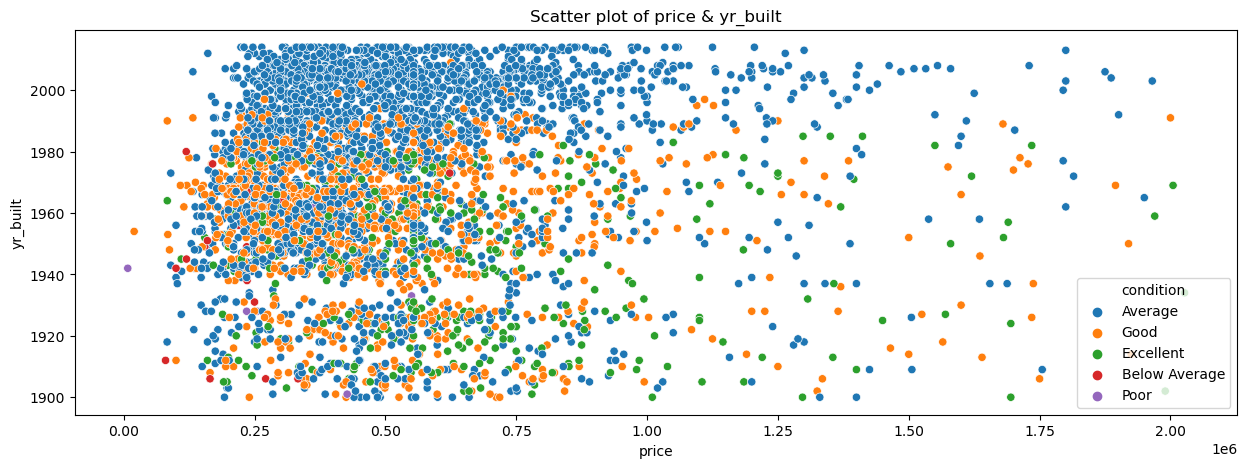

In [54]:
# Determining the relationship between 'yr_built' and 'Price' of different condition

plt.figure(figsize=(15,5))
count1 = house['city'].value_counts()
sns.scatterplot(x='price',y='yr_built',data=house,hue='condition')
plt.title('Scatter plot of price & yr_built')
plt.xlabel('price')
plt.ylabel('yr_built')
plt.show()

From this, we infer that <b>house built after 2000 are in average condition.<b>

### Heat Map

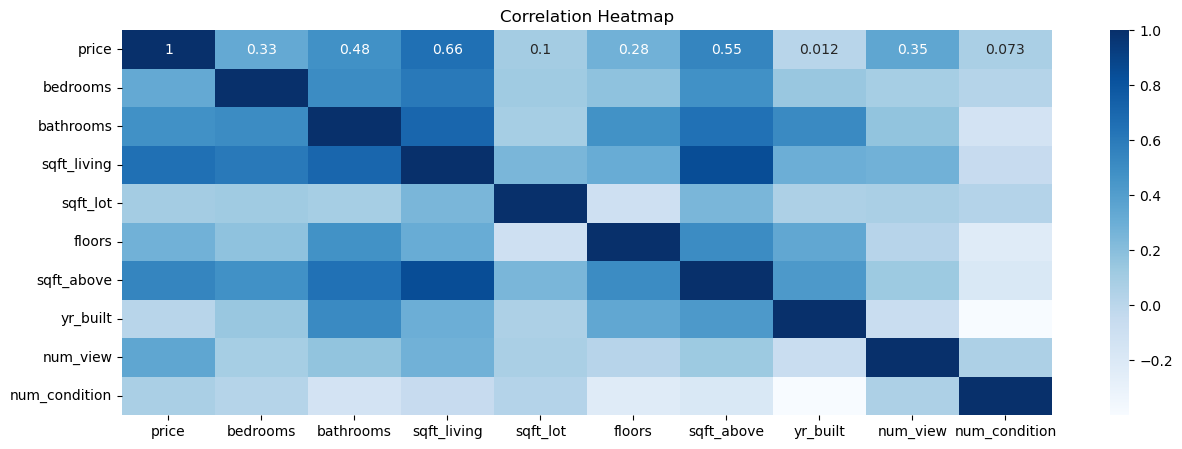

In [55]:
# Analysing correlation of continous variables

plt.figure(figsize=(15,5))
cor=numeric_columns.corr()
sns.heatmap(cor,annot=True,cmap="Blues")
plt.title('Correlation Heatmap')
plt.show()

From this,we can say that the <b>Price and sqft_living are highly correlated.<b>

In [56]:
# Save the standardized DataFrame to a new CSV file
house.to_csv('House.csv', index=False)